In [9]:
import importlib #библиотека для импорта модулей
import os # использую работу с файлами
from abstractmodule import AbstractModule # для проверки типов

In [11]:
importlib.invalidate_caches() # очистить кеш импорта
module_dir = './'
imports = []
step = 0
results = {}
with os.scandir(module_dir) as files:
    for file in files : # считали все файлы из каталога
        if file.name.endswith("py") and file.name != "abstractmodule.py" :
            # нужны файлы *.py
            module_name = file.name.replace(".py", "")
            unit = importlib.import_module(module_name) # импортировать список не очень круто
            #print(dir(unit))
            if "createinstance" in dir(unit): 
                imports.append(unit)  # если в модуле есть createinstance, добавляю его в список
instances = []
for element in imports:
    #print(dir(element))
    instance = element.createinstance()
    if isinstance(instance, AbstractModule):
        # добавляем в список только модули
        instances.append(instance)
for instance in instances:
    # печатаем состав того, чего наимпортировали
    print(f"Module name: '{instance.name()}'")
#print("begin modelling")
for instance in instances:    
    instance.prepare() # нулевой шаг моделирования - задание начальных условий
    results[instance.name()] = [[],[]]
    #print(f"making preparations for {instance.name()}")
#print("stepping begins")
done = False
while not done: # где тут ошибка?  это цикл шагов моделирования
    done = True
    step += 1
    #print(f"step {step} : ")
    for instance in instances:
        done = done and instance.is_done()
        if not instance.is_done(): # проверка на конец счета
            # делаем шаг, записываем результаты
            result_on_step = instance.step()
            results[instance.name()][0].append(result_on_step[0])
            results[instance.name()][1].append(result_on_step[1])
#print("end stepping")
#print(results)    

Module name: 'sivanov_simple_module_two'
Module name: 'sivanov_simple_module'


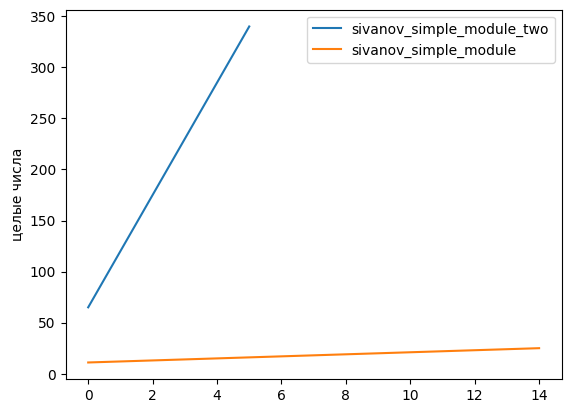

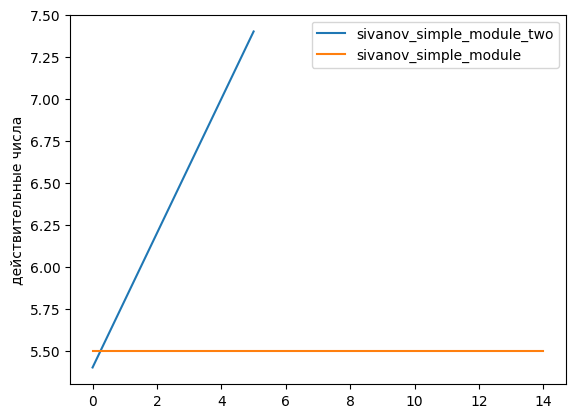

In [12]:
#рисуем графики результатов. в графиках я не очень разбираюсь 
#и врядли круто разберусь до четверга
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
for single_data_name in results:
    ax.plot(results[single_data_name][1], label = single_data_name)
    ax.legend()
plt.ylabel('целые числа')
plt.show()

fig, ax = plt.subplots()
for single_data_name in results:
    ax.plot(results[single_data_name][0], label = single_data_name)
    ax.legend()
plt.ylabel('действительные числа')
plt.show()
